In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
train_dir = "../train" #passing the path with training images
test_dir = "../test"   #passing the path with testing images

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)



train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                                                         )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

In [7]:
len(train_generator)

359

In [8]:
X_train.shape

(64, 48, 48, 1)

In [9]:
y_train.shape

(64, 7)

In [10]:
X_test.shape

(64, 48, 48, 1)

In [11]:
y_test.shape

(64, 7)

In [12]:
class_names = train_generator.class_indices

class_names_swap = {v: k for k, v in class_names.items()}
print(class_names_swap)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


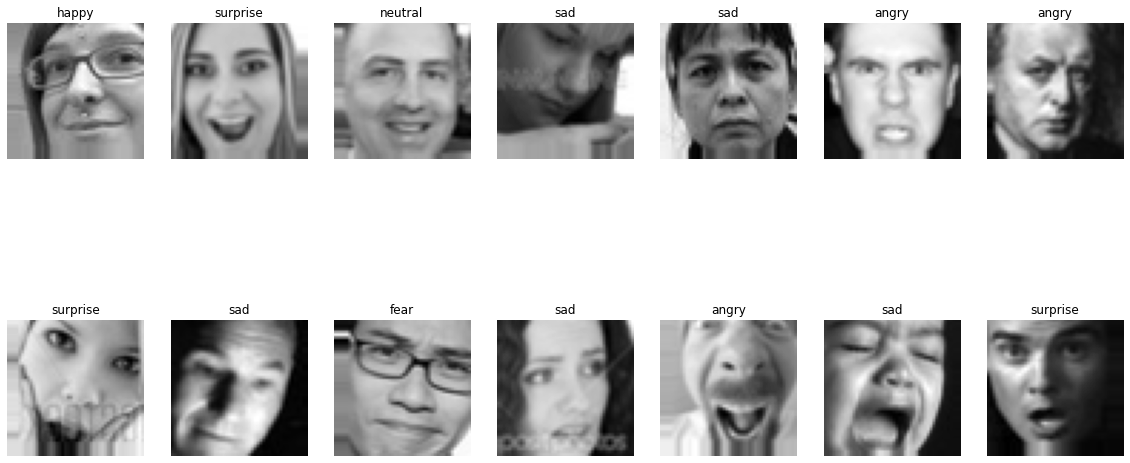

In [13]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np 

r = random.sample(range(X_train.shape[0]), 14)
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(X_train[r[i]],'gray')
    plt.title(class_names_swap[np.argmax(y_train[r[i]])])
    plt.axis("off")    

In [14]:
from sklearn.utils import class_weight 
import numpy as np

class_weights = class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(train_generator.classes), 
            y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))
# model.fit_generator(..., class_weight=train_class_weights)

In [15]:
train_class_weights

{0: 1.0266404434114071,
 1: 9.401555464592715,
 2: 1.0009587727708533,
 3: 0.5684585684585685,
 4: 0.826068191627104,
 5: 0.8491570541259982,
 6: 1.2933160650937552}

In [16]:
class_names_swap

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [19]:
def model_five(shape = (32, 32, 3), classes = 10):
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = identity_block(x, 64)
    x = identity_block(x, 64)
    x = identity_block(x, 64)
    x = convolutional_block(x, 128)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = convolutional_block(x, 256)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = convolutional_block(x, 512)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)
    x = tf.keras.layers.Dropout( 0.25)(x)
    x = identity_block(x, 512)
    
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "model_two")
    return model

In [22]:

model = tf.keras.applications.EfficientNetB3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(48, 48, 1),
    pooling=None,
    classes=7,
    classifier_activation="softmax"
)

In [23]:
epochs = 200
batch_size = 64
model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 1)    0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 48, 48, 1)   3           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 49, 49, 1)    0           ['normalization_1[0]

 block2a_dwconv_pad (ZeroPaddin  (None, 25, 25, 144)  0          ['block2a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block2a_dwconv (DepthwiseConv2  (None, 12, 12, 144)  1296       ['block2a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block2a_bn (BatchNormalization  (None, 12, 12, 144)  576        ['block2a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2a_activation (Activation  (None, 12, 12, 144)  0          ['block2a_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block2c_se_squeeze (GlobalAver  (None, 192)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2c_se_reduce[0][0]']      
          

 block3b_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_se_excite (Multiply)   (None, 6, 6, 288)    0           ['block3b_activation[0][0]',     
                                                                  'block3b_se_expand[0][0]']      
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 6, 6, 48)     13824       ['block3b_se_excite[0][0]']      
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 6, 6, 48)    192         ['block3b_project_conv[0][0]']   
 lization)

 block4a_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 3, 3, 288)    0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 3, 3, 96)     27648       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 3, 3, 96)    384         ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_e

 block4c_drop (Dropout)         (None, 3, 3, 96)     0           ['block4c_project_bn[0][0]']     
                                                                                                  
 block4c_add (Add)              (None, 3, 3, 96)     0           ['block4c_drop[0][0]',           
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 3, 3, 576)    55296       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 3, 3, 576)   2304        ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_e

 block5a_expand_conv (Conv2D)   (None, 3, 3, 576)    55296       ['block4e_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 3, 3, 576)   2304        ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 3, 3, 576)   0           ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 3, 3, 576)   14400       ['block5a_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block5c_bn (BatchNormalization  (None, 3, 3, 816)   3264        ['block5c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5c_activation (Activation  (None, 3, 3, 816)   0           ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 816)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_s

 )                                                                                                
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 816)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 816)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 34)     27778       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5e_se_reduce[0][0]']      
          

 block6b_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6b_se_reduce[0][0]']      
                                                                                                  
 block6b_se_excite (Multiply)   (None, 2, 2, 1392)   0           ['block6b_activation[0][0]',     
                                                                  'block6b_se_expand[0][0]']      
                                                                                                  
 block6b_project_conv (Conv2D)  (None, 2, 2, 232)    322944      ['block6b_se_excite[0][0]']      
                                                                                                  
 block6b_project_bn (BatchNorma  (None, 2, 2, 232)   928         ['block6b_project_conv[0][0]']   
 lization)

                                                                  'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_project_conv (Conv2D)  (None, 2, 2, 232)    322944      ['block6d_se_excite[0][0]']      
                                                                                                  
 block6d_project_bn (BatchNorma  (None, 2, 2, 232)   928         ['block6d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6d_drop (Dropout)         (None, 2, 2, 232)    0           ['block6d_project_bn[0][0]']     
                                                                                                  
 block6d_add (Add)              (None, 2, 2, 232)    0           ['block6d_drop[0][0]',           
          

 lization)                                                                                        
                                                                                                  
 block6f_drop (Dropout)         (None, 2, 2, 232)    0           ['block6f_project_bn[0][0]']     
                                                                                                  
 block6f_add (Add)              (None, 2, 2, 232)    0           ['block6f_drop[0][0]',           
                                                                  'block6e_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 2, 2, 1392)   322944      ['block6f_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 2, 2, 1392)  5568        ['block7a_expand_conv[0][0]']    
 ization) 

                                                                                                  
 top_activation (Activation)    (None, 2, 2, 1536)   0           ['top_bn[0][0]']                 
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['top_activation[0][0]']         
 2D)                                                                                              
                                                                                                  
 top_dropout (Dropout)          (None, 1536)         0           ['avg_pool[0][0]']               
                                                                                                  
 predictions (Dense)            (None, 7)            10759       ['top_dropout[0][0]']            
                                                                                                  
Total para

In [24]:
learning_rate = 0.001
decay_rate = learning_rate / 25
# momentum = 0.8
opt = Adam(lr=learning_rate,  decay=decay_rate)


model.compile(
    optimizer = opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'fer-51.h5', 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [26]:
import scipy.integrate

import scipy.special
import scipy

history = model.fit(x = train_generator,epochs = epochs,batch_size=batch_size,validation_data = validation_generator,callbacks=[checkpoint])

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 2.7694 - accuracy: 0.2065
Epoch 1: val_accuracy improved from -inf to 0.24721, saving model to fer-51.h5
359/359 [==============================] - 455s 1s/step - loss: 2.7694 - accuracy: 0.2065 - val_loss: 1.8203 - val_accuracy: 0.2472
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 2.3773 - accuracy: 0.2244
Epoch 2: val_accuracy did not improve from 0.24721
359/359 [==============================] - 205s 572ms/step - loss: 2.3773 - accuracy: 0.2244 - val_loss: 2.8886 - val_accuracy: 0.2465
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 2.2810 - accuracy: 0.2294
Epoch 3: val_accuracy did not improve from 0.24721
359/359 [==============================] - 204s 569ms/step - loss: 2.2810 - accuracy: 0.2294 - val_loss: 2.0181 - val_accuracy: 0.2472
Epoch 4/200
359/359 [==============================] - ETA: 0s - loss: 2.2147 - accuracy: 0.2312
Epoch 4: val_accuracy improve

359/359 [==============================] - 212s 591ms/step - loss: 1.7067 - accuracy: 0.3136 - val_loss: 1.6585 - val_accuracy: 0.3450
Epoch 29/200
359/359 [==============================] - ETA: 0s - loss: 1.6859 - accuracy: 0.3251
Epoch 29: val_accuracy improved from 0.34497 to 0.35684, saving model to fer-51.h5
359/359 [==============================] - 210s 583ms/step - loss: 1.6859 - accuracy: 0.3251 - val_loss: 1.6459 - val_accuracy: 0.3568
Epoch 30/200
359/359 [==============================] - ETA: 0s - loss: 1.6655 - accuracy: 0.3371
Epoch 30: val_accuracy improved from 0.35684 to 0.37360, saving model to fer-51.h5
359/359 [==============================] - 205s 570ms/step - loss: 1.6655 - accuracy: 0.3371 - val_loss: 1.6272 - val_accuracy: 0.3736
Epoch 31/200
359/359 [==============================] - ETA: 0s - loss: 1.6428 - accuracy: 0.3477
Epoch 31: val_accuracy did not improve from 0.37360
359/359 [==============================] - 199s 553ms/step - loss: 1.6428 - accurac

359/359 [==============================] - 215s 598ms/step - loss: 1.2021 - accuracy: 0.5413 - val_loss: 1.1708 - val_accuracy: 0.5405
Epoch 56/200
359/359 [==============================] - ETA: 0s - loss: 1.1878 - accuracy: 0.5465
Epoch 56: val_accuracy did not improve from 0.54050
359/359 [==============================] - 207s 575ms/step - loss: 1.1878 - accuracy: 0.5465 - val_loss: 1.2553 - val_accuracy: 0.5175
Epoch 57/200
359/359 [==============================] - ETA: 0s - loss: 1.1834 - accuracy: 0.5520
Epoch 57: val_accuracy improved from 0.54050 to 0.56075, saving model to fer-51.h5
359/359 [==============================] - 213s 592ms/step - loss: 1.1834 - accuracy: 0.5520 - val_loss: 1.1573 - val_accuracy: 0.5608
Epoch 58/200
359/359 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.5564
Epoch 58: val_accuracy improved from 0.56075 to 0.56774, saving model to fer-51.h5
359/359 [==============================] - 212s 590ms/step - loss: 1.1640 - accurac

359/359 [==============================] - ETA: 0s - loss: 0.9716 - accuracy: 0.6284
Epoch 83: val_accuracy did not improve from 0.61732
359/359 [==============================] - 201s 559ms/step - loss: 0.9716 - accuracy: 0.6284 - val_loss: 1.0942 - val_accuracy: 0.5859
Epoch 84/200
359/359 [==============================] - ETA: 0s - loss: 0.9618 - accuracy: 0.6358
Epoch 84: val_accuracy did not improve from 0.61732
359/359 [==============================] - 202s 562ms/step - loss: 0.9618 - accuracy: 0.6358 - val_loss: 1.0554 - val_accuracy: 0.6068
Epoch 85/200
359/359 [==============================] - ETA: 0s - loss: 0.9363 - accuracy: 0.6464
Epoch 85: val_accuracy improved from 0.61732 to 0.62360, saving model to fer-51.h5
359/359 [==============================] - 209s 583ms/step - loss: 0.9363 - accuracy: 0.6464 - val_loss: 1.0448 - val_accuracy: 0.6236
Epoch 86/200
359/359 [==============================] - ETA: 0s - loss: 0.9205 - accuracy: 0.6543
Epoch 86: val_accuracy did no

Epoch 112/200
359/359 [==============================] - ETA: 0s - loss: 0.7989 - accuracy: 0.7018
Epoch 112: val_accuracy did not improve from 0.62360
359/359 [==============================] - 200s 557ms/step - loss: 0.7989 - accuracy: 0.7018 - val_loss: 1.0741 - val_accuracy: 0.6103
Epoch 113/200
359/359 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.7118
Epoch 113: val_accuracy did not improve from 0.62360
359/359 [==============================] - 201s 559ms/step - loss: 0.7704 - accuracy: 0.7118 - val_loss: 1.1001 - val_accuracy: 0.6096
Epoch 114/200
359/359 [==============================] - ETA: 0s - loss: 0.7557 - accuracy: 0.7194
Epoch 114: val_accuracy did not improve from 0.62360
359/359 [==============================] - 200s 558ms/step - loss: 0.7557 - accuracy: 0.7194 - val_loss: 1.0719 - val_accuracy: 0.6041
Epoch 115/200
359/359 [==============================] - ETA: 0s - loss: 0.7796 - accuracy: 0.7076
Epoch 115: val_accuracy did not improve 

359/359 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.7854
Epoch 140: val_accuracy did not improve from 0.63198
359/359 [==============================] - 210s 584ms/step - loss: 0.5746 - accuracy: 0.7854 - val_loss: 1.1968 - val_accuracy: 0.6292
Epoch 141/200
359/359 [==============================] - ETA: 0s - loss: 0.6424 - accuracy: 0.7607
Epoch 141: val_accuracy did not improve from 0.63198
359/359 [==============================] - 211s 587ms/step - loss: 0.6424 - accuracy: 0.7607 - val_loss: 1.1479 - val_accuracy: 0.6292
Epoch 142/200
359/359 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.7717
Epoch 142: val_accuracy did not improve from 0.63198
359/359 [==============================] - 210s 584ms/step - loss: 0.6122 - accuracy: 0.7717 - val_loss: 1.2399 - val_accuracy: 0.5880
Epoch 143/200
359/359 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.7753
Epoch 143: val_accuracy did not improve from 0.63198
3

359/359 [==============================] - 199s 555ms/step - loss: 0.3893 - accuracy: 0.8558 - val_loss: 1.4116 - val_accuracy: 0.6264
Epoch 169/200
359/359 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8555
Epoch 169: val_accuracy did not improve from 0.63268
359/359 [==============================] - 199s 554ms/step - loss: 0.3915 - accuracy: 0.8555 - val_loss: 1.3960 - val_accuracy: 0.6110
Epoch 170/200
359/359 [==============================] - ETA: 0s - loss: 0.3831 - accuracy: 0.8591
Epoch 170: val_accuracy did not improve from 0.63268
359/359 [==============================] - 199s 554ms/step - loss: 0.3831 - accuracy: 0.8591 - val_loss: 1.3991 - val_accuracy: 0.6173
Epoch 171/200
359/359 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8606
Epoch 171: val_accuracy improved from 0.63268 to 0.64176, saving model to fer-51.h5
359/359 [==============================] - 203s 566ms/step - loss: 0.3813 - accuracy: 0.8606 - val_loss: 1.4

Epoch 197/200
359/359 [==============================] - ETA: 0s - loss: 0.2936 - accuracy: 0.8954
Epoch 197: val_accuracy did not improve from 0.64176
359/359 [==============================] - 204s 568ms/step - loss: 0.2936 - accuracy: 0.8954 - val_loss: 1.5254 - val_accuracy: 0.6285
Epoch 198/200
359/359 [==============================] - ETA: 0s - loss: 0.2813 - accuracy: 0.8970
Epoch 198: val_accuracy improved from 0.64176 to 0.64316, saving model to fer-51.h5
359/359 [==============================] - 202s 563ms/step - loss: 0.2813 - accuracy: 0.8970 - val_loss: 1.5371 - val_accuracy: 0.6432
Epoch 199/200
359/359 [==============================] - ETA: 0s - loss: 0.2856 - accuracy: 0.8972
Epoch 199: val_accuracy did not improve from 0.64316
359/359 [==============================] - 199s 553ms/step - loss: 0.2856 - accuracy: 0.8972 - val_loss: 1.5397 - val_accuracy: 0.6376
Epoch 200/200
359/359 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.8989
Epoch 200

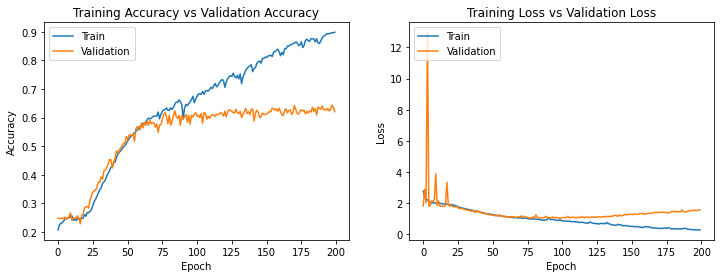

In [27]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [29]:
model.save('deeperdropout51_200_model.h5')
model.save_weights('deeperdropout51_200_weights.h5')

In [30]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 2s 80ms/step - loss: 1.5797 - accuracy: 0.6208
final train accuracy = 94.83 , validation accuracy = 62.08


In [31]:
model = tf.keras.models.load_model('fer-51.h5')

In [32]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 2s 80ms/step - loss: 1.5371 - accuracy: 0.6432
final train accuracy = 94.61 , validation accuracy = 64.32


In [33]:
train_generator.reset()
X_train, y_train = next(train_generator)
for i in range(int(len(train_generator))-1): #1st batch is already fetched before the for loop.
    img, label = next(train_generator)
    X_train = np.append(X_train, img, axis=0 )
    y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

validation_generator.reset()
X_test, y_test = next(validation_generator)
for i in range(int(len(validation_generator))-1): #1st batch is already fetched before the for loop.
    img, label = next(validation_generator)
    X_test = np.append(X_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(22968, 48, 48, 1) (22968, 7)
(1432, 48, 48, 1) (1432, 7)


In [34]:
ypred = model.predict(X_train)
ypred = ypred.argmax(axis=-1)


ytrain = y_train.argmax(axis=-1)

ypred_test = model.predict(X_test)
ypred_test = ypred_test.argmax(axis=-1)



ytest = y_test.argmax(axis=-1)


45/45 [==============================] - 2s 56ms/step


23/23 [==============================] - 5s 88ms/step
Confusion Matrix
[[30  2 26 53 33 29 18]
 [ 4  0  5  6  1  2  4]
 [25  6 28 60 38 29 18]
 [56  3 41 97 69 52 36]
 [38  2 24 68 51 36 27]
 [39  4 32 53 57 33 31]
 [28  1 28 27 29 34 19]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.16      0.15       191
     disgust       0.00      0.00      0.00        22
        fear       0.15      0.14      0.14       204
       happy       0.27      0.27      0.27       354
     neutral       0.18      0.21      0.19       246
         sad       0.15      0.13      0.14       249
    surprise       0.12      0.11      0.12       166

    accuracy                           0.18      1432
   macro avg       0.15      0.15      0.15      1432
weighted avg       0.18      0.18      0.18      1432



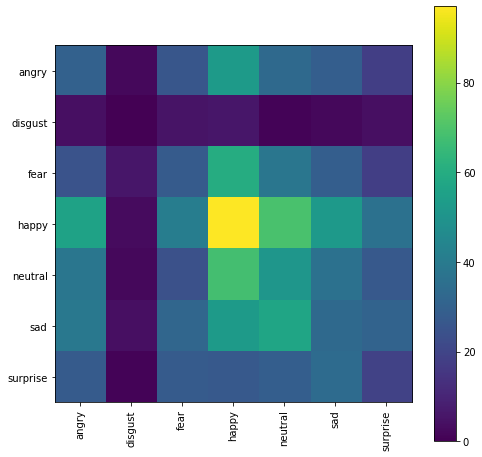

In [35]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

359/359 [==============================] - 27s 76ms/step
Confusion Matrix
[[ 461   46  444  841  544  496  364]
 [  49    5   56   92   50   60   37]
 [ 449   51  455  808  588  575  352]
 [ 824   91  803 1431 1036  932  655]
 [ 584   77  551  985  690  666  419]
 [ 539   55  521  977  656  652  464]
 [ 380   23  337  640  454  414  289]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3196
     disgust       0.01      0.01      0.01       349
        fear       0.14      0.14      0.14      3278
       happy       0.25      0.25      0.25      5772
     neutral       0.17      0.17      0.17      3972
         sad       0.17      0.17      0.17      3864
    surprise       0.11      0.11      0.11      2537

    accuracy                           0.17     22968
   macro avg       0.14      0.14      0.14     22968
weighted avg       0.17      0.17      0.17     22968



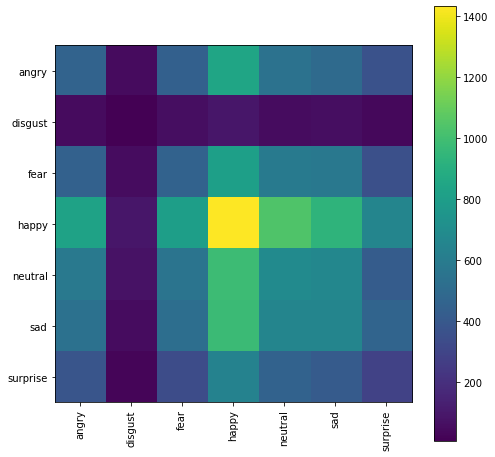

In [36]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = train_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

ROC AUC score: 0.9707377230866677


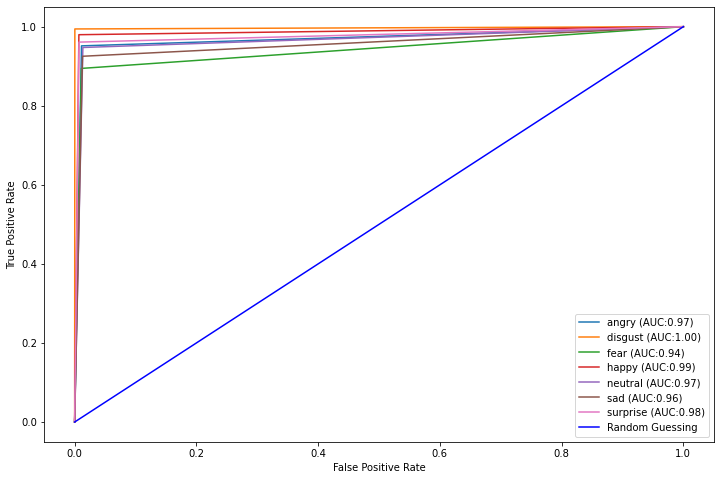

In [37]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['angry', 'disgust', 'fear', 'happy', 'neutral',
          'sad', 'surprise']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average,multi_class='ovo')


print('ROC AUC score:', multiclass_roc_auc_score(ytrain, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

ROC AUC score: 0.9707377230866677


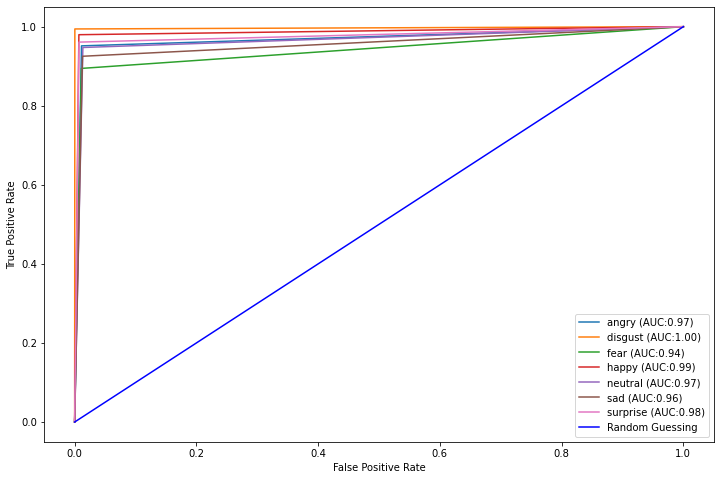

In [38]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['angry', 'disgust', 'fear', 'happy', 'neutral',
          'sad', 'surprise']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average,multi_class='ovr')


print('ROC AUC score:', multiclass_roc_auc_score(ytrain, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

ROC AUC score: 0.7809013302287039


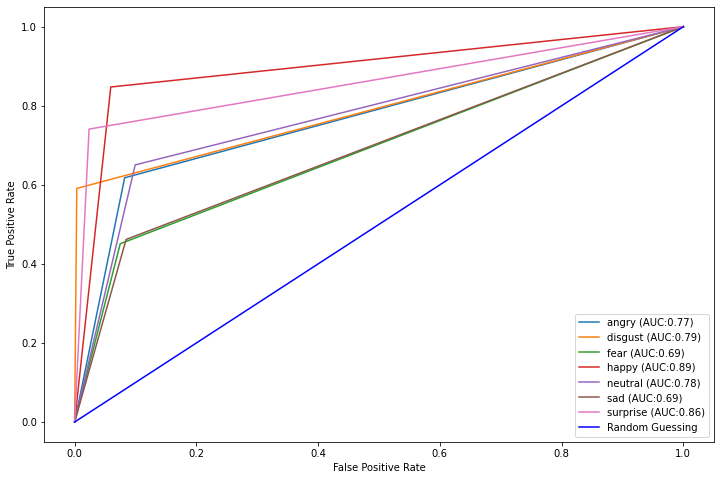

In [39]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred_test))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()